In [1]:
from models import *
from training import train_multi_modal
from torch.nn import BCEWithLogitsLoss
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

# Load dataset
training_set = np.load('training_set.npz')
env_vars = training_set['env']
timeseries = training_set['landsat']
images = training_set['images']
labels = training_set['labels']

validation_set = np.load('validation_set.npz')
val_env_vars = validation_set['env']
val_timeseries = validation_set['landsat']
val_images = validation_set['images']
val_labels = validation_set['labels']

batch_size = 16

dataset = MultiModalDataset(env_vars, timeseries, images, labels)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

val_dataset = MultiModalDataset(val_env_vars, val_timeseries, val_images, val_labels)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Weight classes differently
cls_cnts = labels.sum(axis=0)
pos_weights = torch.tensor((labels.shape[0] - cls_cnts) / cls_cnts)

## Simple sum

In [27]:
# # Set model parameters
# epochs = 40
# batch_size = 16
# lr = 1e-4
# embed_dim = 64
# hidden_dim = embed_dim * 2
# dropout = 0

# model = MultiModalSimpleFuser(env_vars.shape[-1], timeseries.shape[-1], hidden_dim, embed_dim, dropout, use_sum=True)
# print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr)
# criterion = BCEWithLogitsLoss(reduction='mean', pos_weight=pos_weights)
# scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

# losses, vlosses = train_multi_modal(model, dataloader, val_loader, epochs, optimizer, scheduler, criterion, device)

# fig, ax = plt.subplots()

# ax.plot(losses, 'r.', label='Training')
# ax.plot(vlosses, 'b*', label='Validation')
# ax.set_label('Epoch')
# ax.set_ylabel('Loss')

# fig.legend()
# plt.show()

## Attention pooling

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn(


Total params of MultiModalAttentionFuser: 189846


Epoch:   2%|▏         | 1/50 [00:57<47:13, 57.83s/it]

Epoch 1/50 | Train Loss: 1.3347 | Val Loss: 1.3428


Epoch:   4%|▍         | 2/50 [01:57<47:04, 58.84s/it]

Epoch 2/50 | Train Loss: 1.3340 | Val Loss: 1.3346


Epoch:   6%|▌         | 3/50 [03:00<47:36, 60.77s/it]

Epoch 3/50 | Train Loss: 1.3139 | Val Loss: 1.2791


Epoch:   8%|▊         | 4/50 [04:05<47:56, 62.54s/it]

Epoch 4/50 | Train Loss: 1.2346 | Val Loss: 1.2173


Epoch:  10%|█         | 5/50 [05:11<47:44, 63.66s/it]

Epoch 5/50 | Train Loss: 1.1993 | Val Loss: 1.1872


Epoch:  12%|█▏        | 6/50 [06:17<47:19, 64.54s/it]

Epoch 6/50 | Train Loss: 1.1842 | Val Loss: 1.1817


Epoch:  14%|█▍        | 7/50 [07:23<46:40, 65.13s/it]

Epoch 7/50 | Train Loss: 1.1796 | Val Loss: 1.1785


Epoch:  16%|█▌        | 8/50 [08:29<45:47, 65.42s/it]

Epoch 8/50 | Train Loss: 1.1761 | Val Loss: 1.1734


Epoch:  18%|█▊        | 9/50 [09:36<44:55, 65.74s/it]

Epoch 9/50 | Train Loss: 1.1723 | Val Loss: 1.1781


Epoch:  20%|██        | 10/50 [10:47<44:57, 67.44s/it]

Epoch 10/50 | Train Loss: 1.1671 | Val Loss: 1.1823


Epoch:  22%|██▏       | 11/50 [12:02<45:23, 69.82s/it]

Epoch 11/50 | Train Loss: 1.1655 | Val Loss: 1.1728


Epoch:  24%|██▍       | 12/50 [13:19<45:31, 71.88s/it]

Epoch 12/50 | Train Loss: 1.1586 | Val Loss: 1.1642


Epoch:  26%|██▌       | 13/50 [14:37<45:30, 73.79s/it]

Epoch 13/50 | Train Loss: 1.1529 | Val Loss: 1.1558


Epoch:  28%|██▊       | 14/50 [15:54<44:47, 74.64s/it]

Epoch 14/50 | Train Loss: 1.1405 | Val Loss: 1.1462


Epoch:  30%|███       | 15/50 [17:09<43:40, 74.86s/it]

Epoch 15/50 | Train Loss: 1.1339 | Val Loss: 1.1449


Epoch:  32%|███▏      | 16/50 [18:24<42:26, 74.90s/it]

Epoch 16/50 | Train Loss: 1.1296 | Val Loss: 1.1297


Epoch:  34%|███▍      | 17/50 [19:37<40:53, 74.35s/it]

Epoch 17/50 | Train Loss: 1.1241 | Val Loss: 1.1246


Epoch:  36%|███▌      | 18/50 [20:49<39:11, 73.47s/it]

Epoch 18/50 | Train Loss: 1.1198 | Val Loss: 1.1234


Epoch:  38%|███▊      | 19/50 [22:00<37:35, 72.75s/it]

Epoch 19/50 | Train Loss: 1.1117 | Val Loss: 1.1178


Epoch:  40%|████      | 20/50 [23:12<36:15, 72.52s/it]

Epoch 20/50 | Train Loss: 1.1070 | Val Loss: 1.1042


Epoch:  42%|████▏     | 21/50 [24:24<34:57, 72.33s/it]

Epoch 21/50 | Train Loss: 1.1006 | Val Loss: 1.1078


Epoch:  44%|████▍     | 22/50 [25:33<33:18, 71.37s/it]

Epoch 22/50 | Train Loss: 1.0928 | Val Loss: 1.0970


Epoch:  46%|████▌     | 23/50 [26:40<31:31, 70.07s/it]

Epoch 23/50 | Train Loss: 1.0865 | Val Loss: 1.0925


Epoch:  48%|████▊     | 24/50 [27:45<29:48, 68.78s/it]

Epoch 24/50 | Train Loss: 1.0825 | Val Loss: 1.0897


Epoch:  50%|█████     | 25/50 [28:51<28:17, 67.88s/it]

Epoch 25/50 | Train Loss: 1.0736 | Val Loss: 1.0792


Epoch:  52%|█████▏    | 26/50 [29:57<26:50, 67.11s/it]

Epoch 26/50 | Train Loss: 1.0677 | Val Loss: 1.0720


Epoch:  54%|█████▍    | 27/50 [31:02<25:31, 66.60s/it]

Epoch 27/50 | Train Loss: 1.0615 | Val Loss: 1.0805


Epoch:  56%|█████▌    | 28/50 [32:07<24:17, 66.23s/it]

Epoch 28/50 | Train Loss: 1.0554 | Val Loss: 1.0643


Epoch:  58%|█████▊    | 29/50 [33:13<23:09, 66.17s/it]

Epoch 29/50 | Train Loss: 1.0513 | Val Loss: 1.0664


Epoch:  60%|██████    | 30/50 [34:18<21:52, 65.61s/it]

Epoch 30/50 | Train Loss: 1.0482 | Val Loss: 1.0653


Epoch:  62%|██████▏   | 31/50 [35:22<20:40, 65.31s/it]

Epoch 31/50 | Train Loss: 1.0439 | Val Loss: 1.0594


Epoch:  64%|██████▍   | 32/50 [36:27<19:32, 65.12s/it]

Epoch 32/50 | Train Loss: 1.0447 | Val Loss: 1.0583


Epoch:  66%|██████▌   | 33/50 [37:32<18:25, 65.01s/it]

Epoch 33/50 | Train Loss: 1.0377 | Val Loss: 1.0525


Epoch:  68%|██████▊   | 34/50 [38:37<17:20, 65.03s/it]

Epoch 34/50 | Train Loss: 1.0343 | Val Loss: 1.0463


Epoch:  70%|███████   | 35/50 [39:42<16:15, 65.04s/it]

Epoch 35/50 | Train Loss: 1.0306 | Val Loss: 1.0434


Epoch:  72%|███████▏  | 36/50 [40:47<15:09, 64.97s/it]

Epoch 36/50 | Train Loss: 1.0287 | Val Loss: 1.0462


Epoch:  74%|███████▍  | 37/50 [41:52<14:04, 64.93s/it]

Epoch 37/50 | Train Loss: 1.0235 | Val Loss: 1.0415


Epoch:  76%|███████▌  | 38/50 [42:56<12:57, 64.75s/it]

Epoch 38/50 | Train Loss: 1.0193 | Val Loss: 1.0368


Epoch:  78%|███████▊  | 39/50 [44:00<11:51, 64.71s/it]

Epoch 39/50 | Train Loss: 1.0183 | Val Loss: 1.0407


Epoch:  80%|████████  | 40/50 [45:05<10:46, 64.67s/it]

Epoch 40/50 | Train Loss: 1.0139 | Val Loss: 1.0324


Epoch:  82%|████████▏ | 41/50 [46:10<09:42, 64.74s/it]

Epoch 41/50 | Train Loss: 1.0142 | Val Loss: 1.0318


Epoch:  84%|████████▍ | 42/50 [47:15<08:39, 64.91s/it]

Epoch 42/50 | Train Loss: 1.0112 | Val Loss: 1.0342


Epoch:  86%|████████▌ | 43/50 [48:20<07:34, 64.90s/it]

Epoch 43/50 | Train Loss: 1.0071 | Val Loss: 1.0398


Epoch:  88%|████████▊ | 44/50 [49:25<06:28, 64.75s/it]

Epoch 44/50 | Train Loss: 1.0030 | Val Loss: 1.0280


Epoch:  90%|█████████ | 45/50 [50:29<05:22, 64.59s/it]

Epoch 45/50 | Train Loss: 1.0025 | Val Loss: 1.0273


Epoch:  92%|█████████▏| 46/50 [51:33<04:18, 64.54s/it]

Epoch 46/50 | Train Loss: 0.9992 | Val Loss: 1.0323


Epoch:  94%|█████████▍| 47/50 [52:38<03:13, 64.53s/it]

Epoch 47/50 | Train Loss: 0.9955 | Val Loss: 1.0299


Epoch:  96%|█████████▌| 48/50 [53:42<02:08, 64.42s/it]

Epoch 48/50 | Train Loss: 0.9950 | Val Loss: 1.0227


Epoch:  98%|█████████▊| 49/50 [54:46<01:04, 64.47s/it]

Epoch 49/50 | Train Loss: 0.9954 | Val Loss: 1.0335


Epoch: 100%|██████████| 50/50 [55:51<00:00, 67.03s/it]

Epoch 50/50 | Train Loss: 0.9911 | Val Loss: 1.0184


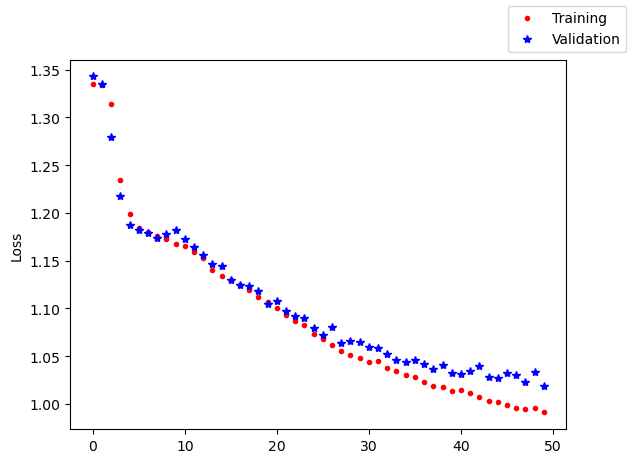

In [2]:
# Set model parameters
epochs = 50
batch_size = 16
lr = 4e-5
embed_dim = 64
hidden_dim = embed_dim * 2
dropout = 0.25
use_balancing = False
alpha = 0.65567
save_results = True

model = MultiModalAttentionFuser(env_vars.shape[-1], timeseries.shape[-1], hidden_dim, embed_dim, dropout, rnn_layers=1, resnet_model=18)
print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

optimizer = AdamW(model.parameters(), lr)
criterion = BCEWithLogitsLoss(reduction='mean', pos_weight=pos_weights)
scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

losses, vlosses = train_multi_modal(model, dataloader, val_loader, epochs, optimizer, scheduler, 
                        criterion, device, pos_weights, use_balancing=use_balancing, use_bce=True, alpha=alpha)

if save_results:
    if use_balancing:
        torch.save(model.state_dict(), f'results/model_{epochs}_{lr}_{dropout}_{alpha}.pt')
    else:
        torch.save(model.state_dict(), f'results/model_{epochs}_{lr}_{dropout}.pt')
        
fig, ax = plt.subplots()

ax.plot(losses, 'r.', label='Training')
ax.plot(vlosses, 'b*', label='Validation')
ax.set_label('Epoch')
ax.set_ylabel('Loss')

fig.legend()
plt.show()

### ROC / AUC

In [17]:
from sklearn.metrics import f1_score, recall_score, roc_curve, auc, precision_score

y_labels = []
y_scores = []

m = nn.Sigmoid()

model.eval()
with torch.no_grad():
    batch_vloss = []
    for env_vars, landsat, images, labels in val_loader:
        env_vars.to(device)
        landsat.to(device)
        images.to(device)
        labels.to(device)

        val_predictions = model(env_vars, landsat, images)
        
        y_labels.extend(labels)
        y_scores.extend(m(val_predictions))

y_labels = np.array(y_labels)
y_scores = np.array(y_scores)
y_preds = np.where(y_scores > 0.5, 1, 0)


# Mean AUC
auc_scores = []

for i in range(y_labels.shape[-1]):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_labels[:,i], y_scores[:,i])

    # Compute AUC
    auc_scores.append(auc(fpr, tpr))

print(f"Mean AUC score across all labels: {np.mean(auc_scores)}")
print(f"Max AUC score: {np.max(auc_scores)}, Index: {np.argmax(auc_scores)}")
print(f"Min AUC score: {np.min(auc_scores)}, Index: {np.argmin(auc_scores)}")
print(f"Std of AUC scores: {np.std(auc_scores)}\n\n")

print(f"Recall score: {recall_score(y_labels, y_preds, average='macro')}")
print(f"Recall score (micro): {recall_score(y_labels, y_preds, average='micro')}")
print(f"Precision score (micro): {precision_score(y_labels, y_preds, average='micro')}")
print(f"Precision score (macro): {precision_score(y_labels, y_preds, average='macro')}")
print(f"F1 Score using macro average: {f1_score(y_labels, y_preds, average='macro')}")
print(f"F1 Score using micro average: {f1_score(y_labels, y_preds, average='micro')}")

Mean AUC score across all labels: 0.7798978113438693
Max AUC score: 0.9912121212121212, Index: 136
Min AUC score: 0.5342966892262667, Index: 121
Std of AUC scores: 0.09960112470799418


Recall score: 0.8024647442571551
Recall score (micro): 0.8006667700418669
Precision score (micro): 0.07957925560607228
Precision score (macro): 0.08447773054619484
F1 Score using macro average: 0.1438033097030469
F1 Score using micro average: 0.1447696750497659


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from ipywidgets import IntSlider, interact

@interact(i=IntSlider(value=0, min=0, max=y_labels.shape[-1], step=1))
def roc_plot(i):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_labels[:,i], y_scores[:,i])

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=342), Output()), _dom_classes=('widget-interact'…

## Hyperparameter tuning

In [2]:
from sklearn.metrics import f1_score, recall_score, roc_curve, auc, precision_score
from hyperopt import hp, STATUS_OK

epochs = 80
batch_size = 16
embed_dim = 64
hidden_dim = embed_dim * 2

space = {
    "learning_rate": hp.loguniform("learning_rate", np.log(2e-5), np.log(5e-5)),
    "num_layers": hp.choice("num_layers", [1]),
    "dropout": hp.uniform("dropout", 0.3, 0.5),
    "balancing": hp.choice("balancing", [
        # {
        #     "enabled": False
        # }, 
        {
            "enabled": True,
            "alpha": hp.uniform("alpha", 0.3, 0.7)
        }
    ]),
    #"decision": hp.uniform("decision", 0.3, 0.7)
}

def eval(model, val_loader):
    y_labels = []
    y_scores = []

    m = nn.Sigmoid()

    model.eval()
    with torch.no_grad():
        for env_vars, landsat, images, labels in val_loader:
            env_vars.to(device)
            landsat.to(device)
            images.to(device)
            labels.to(device)

            val_predictions = model(env_vars, landsat, images)
            
            y_labels.extend(labels)
            y_scores.extend(m(val_predictions))

    y_labels = np.array(y_labels)
    y_scores = np.array(y_scores)
    #y_preds = np.where(y_scores > params['decision'], 1, 0)

    # Mean AUC
    auc_scores = []

    for i in range(y_labels.shape[-1]):
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_labels[:,i], y_scores[:,i])

        # Compute AUC
        auc_scores.append(auc(fpr, tpr))

    return np.mean(auc_scores)

def objective(params):
    model = MultiModalAttentionFuser(env_vars.shape[-1], timeseries.shape[-1], hidden_dim, 
                embed_dim, params['dropout'], rnn_layers=params['num_layers'], resnet_model=18)
    
    optimizer = AdamW(model.parameters(), params['learning_rate'])
    criterion = BCEWithLogitsLoss(reduction='mean', pos_weight=pos_weights)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    if params['balancing']['enabled']:
        balancing = True
        alpha = params['balancing']['alpha']
    else:
        balancing = False
        alpha = 0
        
    _, _ = train_multi_modal(model, dataloader, val_loader, epochs, optimizer, scheduler, 
                            criterion, device, pos_weights, use_balancing=balancing, use_bce=True, alpha=alpha)
    
    auc = eval(model, val_loader)
    
    return {
        "loss": -auc,
        "status": STATUS_OK
    }

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials,
    rstate=None
)
print(best)
best_loss = min(trials.losses())
print(best_loss)

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.40400660645838427 and num_layers=1
  warnings.warn(



 20%|██        | 1/5 [1:23:03<5:32:12, 4983.23s/trial, best loss: -0.7558036131859466]

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3046011678655621 and num_layers=1
  warnings.warn(



 40%|████      | 2/5 [2:49:24<4:14:59, 5099.68s/trial, best loss: -0.7768471095830555]

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.392603016673879 and num_layers=1
  warnings.warn(



 60%|██████    | 3/5 [4:12:21<2:48:07, 5043.81s/trial, best loss: -0.7868032349095204]

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4026362007608329 and num_layers=1
  warnings.warn(



 80%|████████  | 4/5 [5:33:20<1:22:50, 4970.84s/trial, best loss: -0.7868032349095204]

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30072203501753136 and num_layers=1
  warnings.warn(



100%|██████████| 5/5 [6:56:07<00:00, 4993.46s/trial, best loss: -0.7868032349095204]  
{'alpha': np.float64(0.6556661182344847), 'balancing': np.int64(0), 'dropout': np.float64(0.392603016673879), 'learning_rate': np.float64(3.9132374325877814e-05), 'num_layers': np.int64(0)}
-0.7868032349095204


In [4]:
print(best)
best_loss = min(trials.losses())
print(best_loss)

{'alpha': np.float64(0.6556661182344847), 'balancing': np.int64(0), 'dropout': np.float64(0.392603016673879), 'learning_rate': np.float64(3.9132374325877814e-05), 'num_layers': np.int64(0)}
-0.7868032349095204


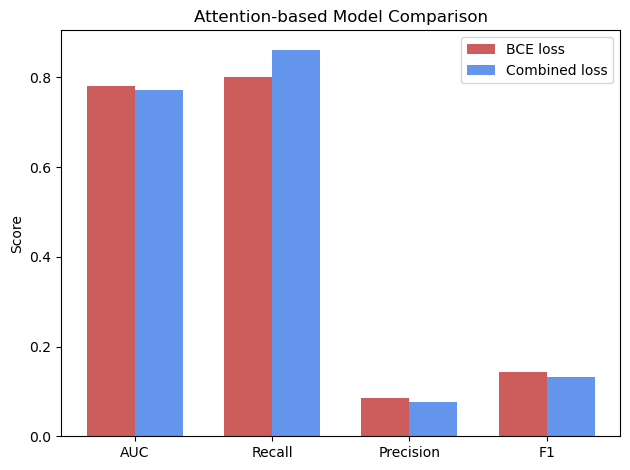

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
color_opts = mcolors.CSS4_COLORS

# Example data
metrics = ["AUC", "Recall", "Precision", "F1"]
model_a = [0.78, 0.80, 0.085, 0.144]
model_b = [0.771, 0.862, 0.076, 0.133]

x = np.arange(len(metrics))      # metric positions
width = 0.35                     # width of each bar

fig, ax = plt.subplots()

ax.bar(x - width/2, model_a, width, label="BCE loss", color=color_opts['indianred'])
ax.bar(x + width/2, model_b, width, label="Combined loss", color=color_opts['cornflowerblue'])

ax.set_ylabel("Score")
ax.set_title("Attention-based Model Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()